In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.options.display.float_format = '{:.0f}'.format

In [4]:
#util function to check for ints
def check_int(value):
    try:
        int(value)
        return np.NaN
    except ValueError:
        return value

In [5]:
df=pd.read_parquet("./2nd_transformed_data.parquet",engine='pyarrow')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 19324990 to 16998076
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coordinate                     1252 non-null   object 
 1   address                        1252 non-null   object 
 2   location_name                  1252 non-null   object 
 3   typeSummary                    1252 non-null   object 
 4   ongoing_bidding                1252 non-null   bool   
 5   foreclosure                    1252 non-null   bool   
 6   price                          1252 non-null   int32  
 7   price_per_area                 1252 non-null   int32  
 8   has_price_change               1252 non-null   bool   
 9   rooms                          1249 non-null   object 
 10  fee                            1252 non-null   int32  
 11  age                            1252 non-null   int64  
 12  deactivated_before_open_house  1252 n

In [6]:
df['living_area'].value_counts()

35     33
34     28
44     22
55     22
81     21
       ..
98      1
36      1
110     1
502     1
30      1
Name: living_area, Length: 270, dtype: int64

In [7]:
df.loc[df['living_area']==502]

,coordinate,address,location_name,typeSummary,ongoing_bidding,foreclosure,price,price_per_area,has_price_change,rooms,...,listingStatus,price_change,area,date,balcony,elevator,patio,tenure_owned,living_area,supplemental_area
id,,,,,,,,,,,,,,,,,,,,,
19244175,"[59.32051888366771, 18.063696193591962]","Bellmansgatan 6A, 1 tr",Stockholms kommun,Bostadsrättslägenhet,False,False,0,0,False,10,...,for_sale,NaN,sodermalm,20221203,True,True,False,False,502,None


In [8]:
df[df.living_area==502].size

35

In [9]:
df.living_area.value_counts(sort=True,normalize=False)

35     33
34     28
44     22
55     22
81     21
       ..
98      1
36      1
110     1
502     1
30      1
Name: living_area, Length: 270, dtype: int64

In [10]:
df.living_area.describe()

count   1248
mean      67
std       38
min       15
25%       42
50%       60
75%       83
max      502
Name: living_area, dtype: float64

In [11]:
df.living_area.mode()

0   35
Name: living_area, dtype: float64

In [12]:
df.living_area==502

id
19324990    False
19325173    False
19102415    False
18956296    False
19158120    False
            ...  
18987175    False
18976122    False
18941998    False
18669396    False
16998076    False
Name: living_area, Length: 1252, dtype: bool

In [13]:
df[df.living_area==502]

,coordinate,address,location_name,typeSummary,ongoing_bidding,foreclosure,price,price_per_area,has_price_change,rooms,...,listingStatus,price_change,area,date,balcony,elevator,patio,tenure_owned,living_area,supplemental_area
id,,,,,,,,,,,,,,,,,,,,,
19244175,"[59.32051888366771, 18.063696193591962]","Bellmansgatan 6A, 1 tr",Stockholms kommun,Bostadsrättslägenhet,False,False,0,0,False,10,...,for_sale,NaN,sodermalm,20221203,True,True,False,False,502,None


<AxesSubplot: ylabel='Frequency'>

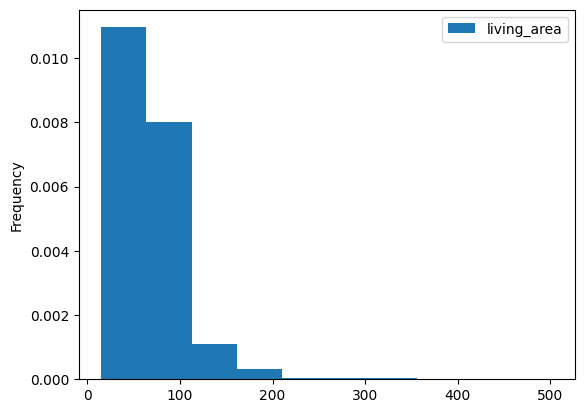

In [14]:
df[['living_area']].plot(kind='hist', density=True, stacked=False)

In [15]:
df['price']

id
19324990    14950000
19325173     6795000
19102415    14995000
18956296     9450000
19158120    19800000
              ...   
18987175     3595000
18976122     6850000
18941998    15495000
18669396     4095000
16998076     3995000
Name: price, Length: 1252, dtype: int32

In [16]:
#df['price']=df['price'].replace('Prissaknas', np.nan)

In [17]:
df['price'].apply(check_int).dropna().value_counts()

Series([], Name: price, dtype: int64)

In [18]:
col = df.loc[:, ['price']]

In [19]:
col.value_counts()

price   
3995000     40
2995000     28
3495000     24
4995000     23
5495000     22
            ..
7900000      1
4145000      1
3980000      1
8000000      1
78000000     1
Length: 371, dtype: int64

In [20]:
col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 19324990 to 16998076
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   1252 non-null   int32
dtypes: int32(1)
memory usage: 14.7 KB


In [21]:
count = col.loc[col['price'] == 0,'price']
count.count()

10

In [22]:
col.values.mean()

5922123.722044729

In [23]:
col.median()

price   4597500
dtype: float64

In [24]:
col.quantile(.5)

price   4597500
Name: 0.5, dtype: float64

array([[<AxesSubplot: title={'center': 'price'}>]], dtype=object)

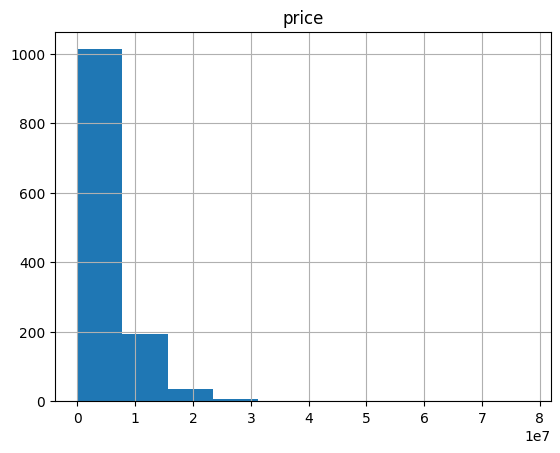

In [25]:
col.hist()

In [26]:
iqr=col.quantile(.75)-col.quantile(.25)
iqr

price   3580000
dtype: float64

In [27]:
col.max()

price    78000000
dtype: int32

In [28]:
col.min()

price    0
dtype: int32

In [29]:
col=col.reset_index(drop=True)

In [30]:
pd.options.display.float_format = '{:.0f}'.format

In [31]:
col.describe()

,price
count,1252
mean,5922124
std,4679745
min,0
25%,3395000
50%,4597500
75%,6975000
max,78000000


<AxesSubplot: ylabel='Frequency'>

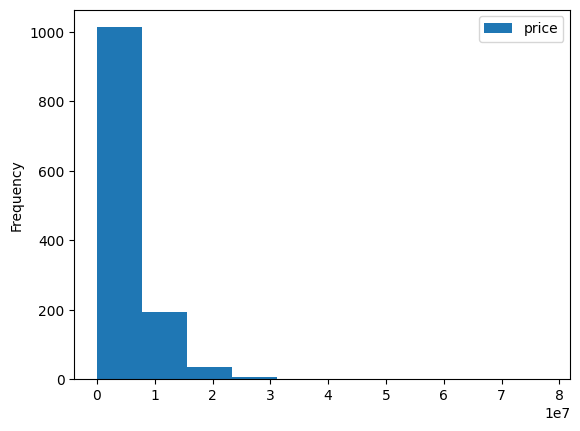

In [32]:
col.plot(kind='hist')

In [33]:
col.sort_values(by='price')

,price
853,0
352,0
567,0
626,0
383,0
...,...
367,30000000
434,37000000
525,39500000
1206,47500000


In [34]:
s=col['price']
s.value_counts()

3995000     40
2995000     28
3495000     24
4995000     23
5495000     22
            ..
9000000      1
12975000     1
8475000      1
6595000      1
10855000     1
Name: price, Length: 371, dtype: int64

col.astype(float)
col.astype(int)

# select only columns with integer data type
columns = col.select_dtypes(include=[np.number])
columns.info()

In [35]:
s.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1252 entries, 0 to 1251
Series name: price
Non-Null Count  Dtype
--------------  -----
1252 non-null   int32
dtypes: int32(1)
memory usage: 5.0 KB


df_string_rows = df2.select_dtypes(include=['object'])
df_string_rows

In [36]:
df['price'].apply(check_int).dropna().value_counts()

Series([], Name: price, dtype: int64)

In [39]:
df['living_area'].apply(check_int).dropna().value_counts()

Series([], Name: living_area, dtype: int64)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 19324990 to 16998076
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coordinate                     1252 non-null   object 
 1   address                        1252 non-null   object 
 2   location_name                  1252 non-null   object 
 3   typeSummary                    1252 non-null   object 
 4   ongoing_bidding                1252 non-null   bool   
 5   foreclosure                    1252 non-null   bool   
 6   price                          1252 non-null   int32  
 7   price_per_area                 1252 non-null   int32  
 8   has_price_change               1252 non-null   bool   
 9   rooms                          1249 non-null   object 
 10  fee                            1252 non-null   int32  
 11  age                            1252 non-null   int64  
 12  deactivated_before_open_house  1252 n

df2['price_per_area'].apply(np.isreal).value_counts()

df2['price_per_area'].str.contains('.*[A-Za-z].*', regex=True).value_counts()
s=df2['price_per_area']
#s=s.str.replace(' ','',regex=True).astype(int)
#s=pd.to_numeric(s,errors='coerce')
#s

pd.DataFrame(s)


r=df2.loc[df2['listingId']=='19330879']

pd.options.display.max_colwidth = 100
print(r['url'])

In [41]:
df[df['listingId'].isna()]['listingId']

Series([], Name: listingId, dtype: object)

df2.loc[df2['fee'].isna(),'fee']

In [42]:
df['listingId']

id
19324990    19324990
19325173    19325173
19102415    19102415
18956296    18956296
19158120    19158120
              ...   
18987175    18987175
18976122    18976122
18941998    18941998
18669396    18669396
16998076    16998076
Name: listingId, Length: 1252, dtype: object

ascii(df2['fee'].head(1).values[0].replace(' ',''))

df2.loc[df2['fee']=='\xa0','fee']

In [ ]:
newone=df.loc[:, ['price', 'fee']]

In [ ]:
newone

,price,fee
id,,
19324990,14950000,4761
19325173,6795000,5850
19102415,14995000,7909
18956296,9450000,2875
19158120,19800000,7999
...,...,...
18987175,3595000,2005
18976122,6850000,3267
18941998,15495000,7233


In [ ]:
newone.loc[:,'price'].value_counts()

3995000     41
2995000     28
3495000     24
4995000     23
5495000     22
            ..
12975000     1
8475000      1
6595000      1
37000000     1
10855000     1
Name: price, Length: 373, dtype: int64

<AxesSubplot: xlabel='price_per_area'>

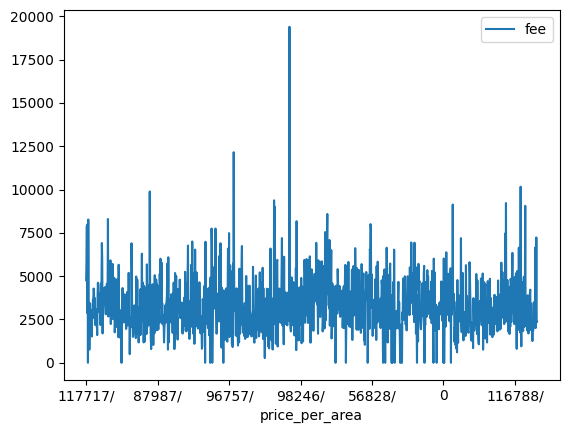

In [ ]:
newone.plot(x='price_per_area',y='fee')